# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset(s)

In [22]:
gold_data = pd.read_csv('../Data/FINAL_USO.xls')
vix_data = pd.read_csv('../Data/VVIX_History.csv')
# Renaming to just be one word
gold_data.rename(columns={"Adj Close": "Adj_close"}, inplace=True)
gold_data.rename(columns={"USO_Adj Close": "USO_Ajclose"}, inplace=True)


# Data Preprocessing

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj_close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:
print(gold_data.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64


In [7]:
gold_data.describe()

,Open,High,Low,Close,Adj_close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [8]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

vix_data = vix_data.rename(columns={'DATE': 'Date'})
vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data.set_index('Date', inplace=True)

In [9]:
start_date = gold_data.index.min()
end_date = gold_data.index.max()

vix_data_filtered = vix_data[(vix_data.index >= start_date) & (vix_data.index <= end_date)]
gold_data.join(vix_data_filtered, how='outer')

,Open,High,Low,Close,Adj_close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,VVIX
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900.0,123.029999,123.199997,121.989998,122.180000,...,51.680000,48.973877,20605600.0,36.900002,36.939999,36.049999,36.130001,36.130001,12616700.0,97.71
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300.0,122.230003,122.949997,121.300003,121.589996,...,52.680000,49.921513,16285400.0,36.180000,36.500000,35.730000,36.270000,36.270000,12578800.0,94.28
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200.0,122.059998,122.320000,120.029999,120.290001,...,51.169998,48.490578,15120200.0,36.389999,36.450001,35.930000,36.200001,36.200001,7418200.0,90.27
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300.0,122.180000,124.139999,120.370003,123.930000,...,52.990002,50.215282,11644900.0,37.299999,37.610001,37.220001,37.560001,37.560001,10041600.0,88.64
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100.0,123.930000,124.360001,122.750000,124.169998,...,52.959999,50.186852,8724300.0,37.669998,38.240002,37.520000,38.110001,38.110001,10728000.0,85.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400.0,239.039993,240.839996,234.270004,234.339996,...,21.090000,21.090000,60507000.0,9.490000,9.520000,9.280000,9.290000,9.290000,21598200.0,111.88
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500.0,235.970001,246.179993,233.759995,246.179993,...,20.620001,20.620001,76365200.0,9.250000,9.920000,9.230000,9.900000,9.900000,40978800.0,97.32
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400.0,242.570007,248.289993,238.960007,248.070007,...,20.969999,20.969999,52393000.0,9.590000,9.650000,9.370000,9.620000,9.620000,36578700.0,95.89


<Figure size 1000x500 with 0 Axes>

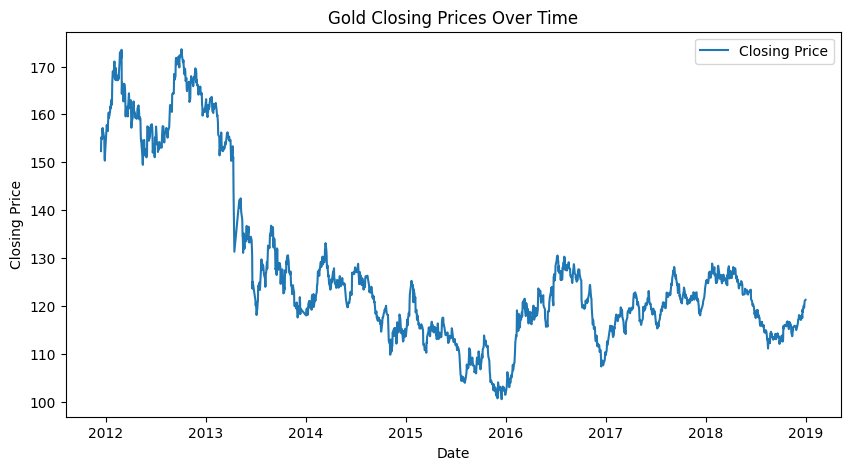

In [17]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

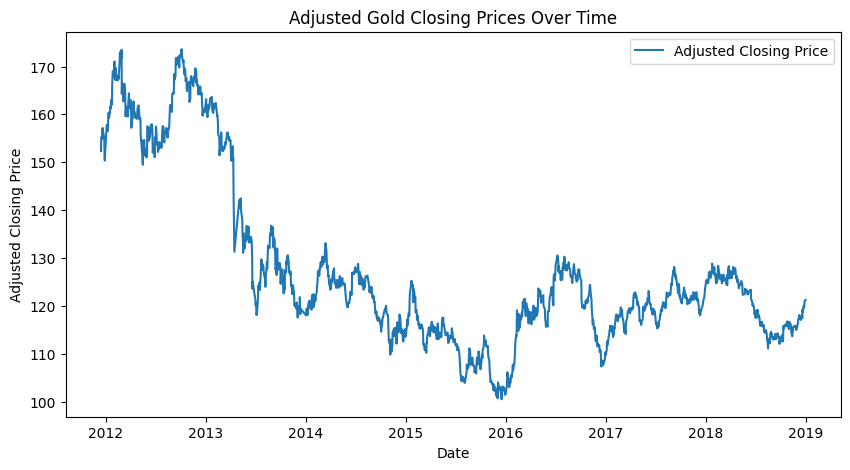

In [16]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Adj_close'], label='Adjusted Closing Price')
plt.title('Adjusted Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

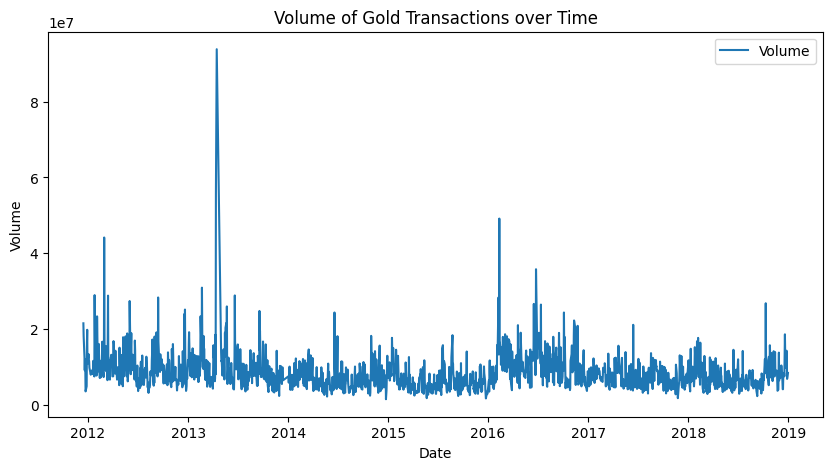

In [15]:
plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.plot(gold_data['Volume'], label='Volume')
plt.title('Volume of Gold Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

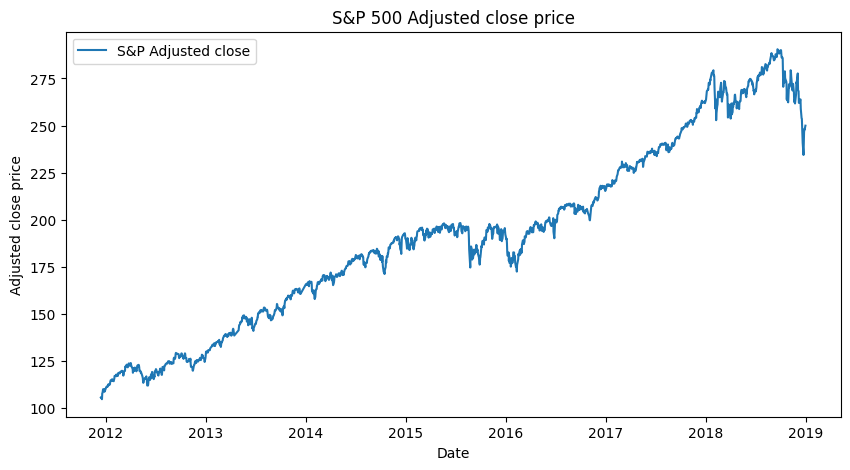

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['SP_Ajclose'], label='S&P Adjusted close')
plt.title('S&P 500 Adjusted close price')
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.legend()
plt.show()

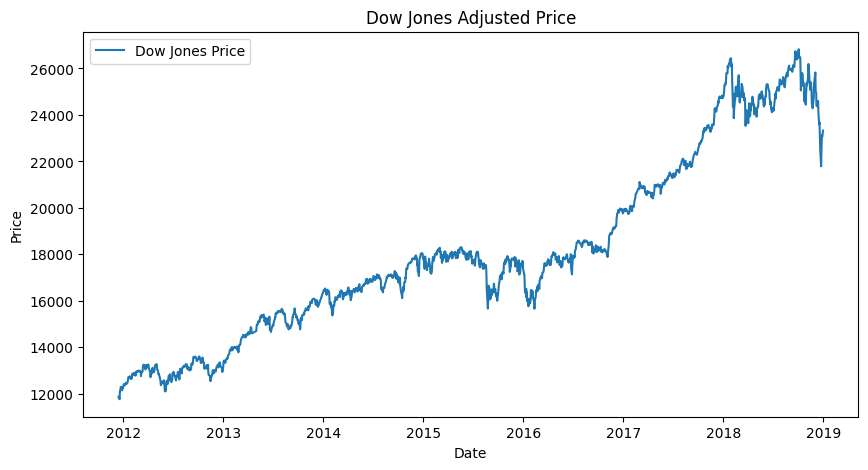

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(gold_data['DJ_Ajclose'], label='Dow Jones Price')
plt.title('Dow Jones Adjusted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
##Computing daily percentage returns on assets

def generate_daily_ret(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

GLD_dly_pret = generate_daily_ret(gold_data["Adj_close"])
SP_dly_pret = generate_daily_ret(gold_data["SP_Ajclose"])
DW_dly_pret = generate_daily_ret(gold_data["DJ_Ajclose"])
EG_dly_pret = generate_daily_ret(gold_data["EG_Ajclose"])
USO_dly_pret = generate_daily_ret(gold_data["USO_Ajclose"])
EU_dly_pret = generate_daily_ret(gold_data["EU_Price"])
OF_dly_pret = generate_daily_ret(gold_data["OF_Price"])
OS_dly_pret = generate_daily_ret(gold_data["OS_Price"])
SF_dly_pret = generate_daily_ret(gold_data["SF_Price"])
USB_dly_pret = generate_daily_ret(gold_data["USB_Ajclose"])
PLT_dly_pret = generate_daily_ret(gold_data["PLT_Ajclose"])
PLD_dly_pret = generate_daily_ret(gold_data["PLD_Ajclose"])
USDI_dly_pret = generate_daily_ret(gold_data["USDI_Ajclose"])
GDX_dly_pret = generate_daily_ret(gold_data["GDX_Ajclose"])



KeyError: 'EU_Ajclose'